<a href="https://colab.research.google.com/github/ST-DevNinja/Logistic-Regression-Model-Train-for-Diabetic-Analysis/blob/main/Logistic_Regression_Model_Train_for_Diabetic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Step 1: Load Libraries and Dataset


# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, classification_report, accuracy_score
)

# Load dataset
file_path = "/diabetes.csv"  # Adjust the path as needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469  

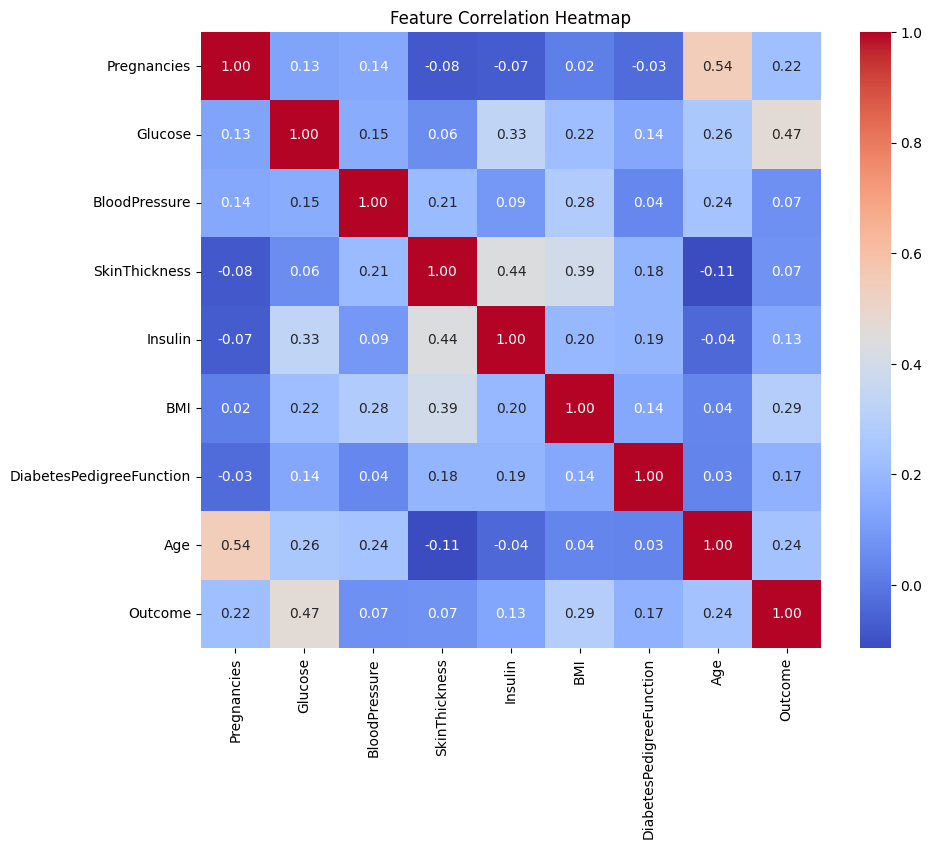

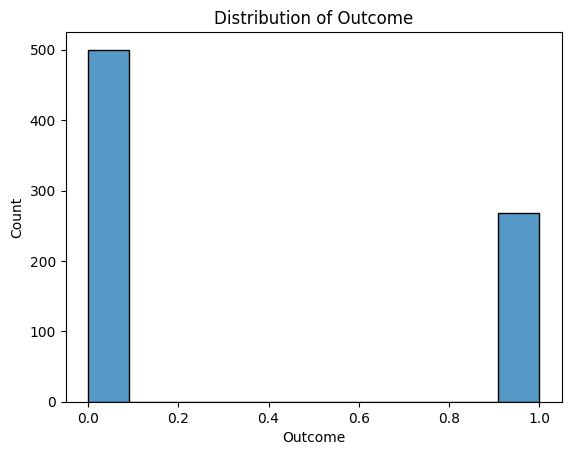

In [3]:
#Step 2: Exploratory Data Analysis (EDA



# General overview
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution plot of the target variable (Outcome)
sns.histplot(df['Outcome'])
plt.title("Distribution of Outcome")
plt.show()


In [4]:
#Step 3: Prepare Data for Training


# Separate features (X) and target (y)
X = df.drop(columns=["Outcome"])  # Exclude the target column
y = df["Outcome"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (614, 8)
Testing Features Shape: (154, 8)
Training Target Shape: (614,)
Testing Target Shape: (154,)


In [5]:
#Step 4: Train Logistic Regression Model And See Accuracy


# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities
y_pred = model.predict(X_test)  # Binary predictions

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display model coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print("\nModel Coefficients:")
print(coefficients)

from sklearn.metrics import classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)




Accuracy: 0.7467532467532467

Model Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.064372
1                   Glucose     0.034094
2             BloodPressure    -0.013879
3             SkinThickness     0.003291
4                   Insulin    -0.001803
5                       BMI     0.102608
6  DiabetesPedigreeFunction     0.626886
7                       Age     0.037097

Accuracy: 0.7467532467532467


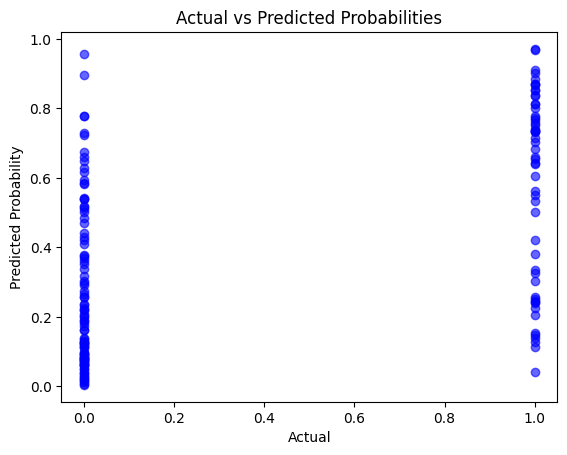

In [6]:
#Step 5: Visualize Results


# Compute residuals
residuals = y_test - y_pred_proba


# Scatter plot of Actual vs Predicted probabilities
plt.scatter(y_test, y_pred_proba, color="blue", alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted Probability")
plt.title("Actual vs Predicted Probabilities")
plt.show()


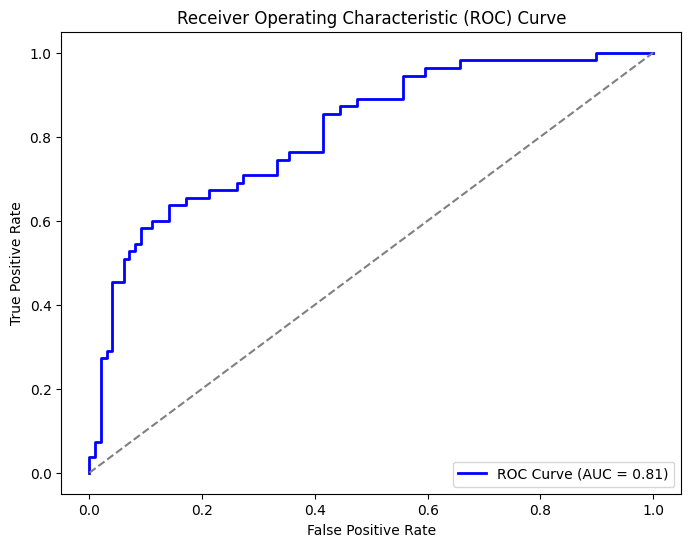

In [7]:
#Step 6: Plot ROC Curve


# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


<ipython-input-8-00e78722c293>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coefficients_sorted, palette="viridis")


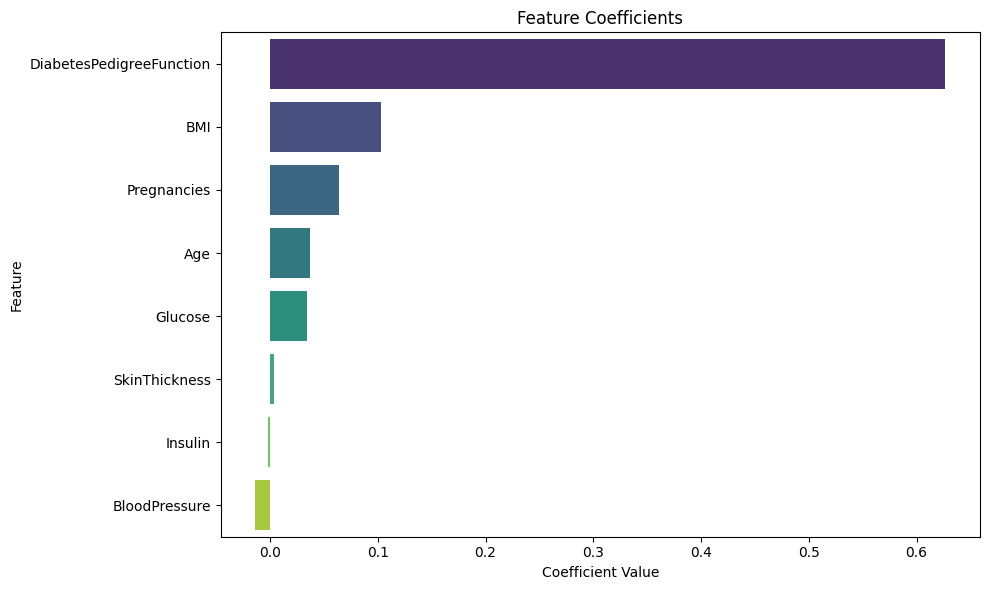

In [8]:
#Step 8: Feature Coefficient Graph


# Sort coefficients for better visualization
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)

# Plot feature coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients_sorted, palette="viridis")
plt.title("Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [9]:
#PREDICTION


# Example feature values (update these based on your dataset)
pregnancies = 3
glucose = 120
blood_pressure = 70
skin_thickness = 25
insulin = 50
bmi = 28.5
diabetes_pedigree_function = 0.5
age = 33

# Create a dictionary for the features
input_data = {
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age]
}

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame(input_data)

# Predict the Outcome using the logistic regression model
predicted_outcome_proba = model.predict_proba(input_df)[:, 1]  # Probability of class 1
predicted_outcome = model.predict(input_df)  # Binary prediction

# Display the predicted probabilities and outcome
print("Predicted Probability of Diabetes (Outcome = 1):", round(predicted_outcome_proba[0], 2))
print("Predicted Outcome (0 = No Diabetes, 1 = Diabetes):", predicted_outcome[0])


Predicted Probability of Diabetes (Outcome = 1): 0.22
Predicted Outcome (0 = No Diabetes, 1 = Diabetes): 0
